In [1]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Import Clean CSV
TB_Rates = Path('Resources/TB_Rates_Cleaned.csv')
HDI = Path('Resources/HDI.csv')

# Create Data Frame
tb_rates_df = pd.read_csv(TB_Rates)
hdi_df = pd.read_csv(HDI)

In [3]:
# Drop Columns
tb_drop =   ['iso2',
            'iso3','iso_numeric',
            'g_whoregion',
            'e_inc_100k_lo',
            'e_inc_100k_hi',
            'cfr_lo',
            'cfr_hi',
            'cfr_pct_lo',
            'cfr_pct_hi',
            'c_cdr',
            'c_cdr_lo',
            'c_cdr_hi',
            'e_inc_num_lo',
            'e_inc_num_hi',
            'e_tbhiv_prct_lo',
            'e_tbhiv_prct_hi',
            'e_inc_tbhiv_100k_lo',
            'e_inc_tbhiv_100k_hi',
            'e_inc_tbhiv_num_lo',
            'e_inc_tbhiv_num_hi',
            'e_mort_exc_tbhiv_100k_lo',
            'e_mort_exc_tbhiv_100k_hi',
            'e_mort_tbhiv_100k_lo',
            'e_mort_tbhiv_100k_hi',
            'e_mort_tbhiv_num_lo',
            'e_mort_tbhiv_num_hi',
            'e_mort_100k_lo',
            'e_mort_100k_hi',
            'e_mort_num_lo',
            'e_mort_num_hi',
            'e_mort_exc_tbhiv_num_lo',
            'e_mort_exc_tbhiv_num_hi',
            ]
tb_rates_df.drop(tb_drop, inplace=True, axis=1)
tb_rates_df.columns


Index(['country', 'year', 'e_pop_num', 'e_inc_100k', 'e_inc_num',
       'e_tbhiv_prct', 'e_inc_tbhiv_100k', 'e_inc_tbhiv_num',
       'e_mort_exc_tbhiv_100k', 'e_mort_exc_tbhiv_num', 'e_mort_tbhiv_100k',
       'e_mort_tbhiv_num', 'e_mort_100k', 'e_mort_num', 'cfr', 'cfr_pct',
       'c_newinc_100k'],
      dtype='object')

In [4]:
#Rename Remaining columns
tb_rename = {'country':'Country', 
            'year':'Year', 
            'e_pop_num':'Population', 
            'e_inc_100k': 'Cases per Cap.(All)', 
            'e_inc_num': 'Cases',
            'e_tbhiv_prct': 'Cases - HIV & TB %', 
            'e_inc_tbhiv_100k': 'Cases -HIV & TB per Cap.', 
            'e_inc_tbhiv_num': 'Cases - HIV & TB',
            'e_mort_exc_tbhiv_100k': 'Mortality - TB (exclude HIV)per Cap', 
            'e_mort_exc_tbhiv_num': 'Mortality - TB (exclude HIV)', 
            'e_mort_tbhiv_100k': 'Mortality - HIV & TB incident per Cap.',
            'e_mort_tbhiv_num':'Mortality - HIV & TB', 
            'e_mort_100k':'Mortality - Per Cap', 
            'e_mort_num': 'Mortality', 
            'cfr':'Case Fatality Ratio', 
            'cfr_pct': 'Case Fatality Ratio %',
            'c_newinc_100k': 'Total New and Relapse Cases'}
tb_rates_df.rename(columns=tb_rename, inplace=True)
hdi_df.rename(columns={'Country_Name':'Country'}, inplace=True)


In [5]:
# handle nas
tb_rates_df["Case Fatality Ratio"].fillna(0, inplace = True)
tb_rates_df["Case Fatality Ratio %"].fillna(0, inplace = True)
tb_rates_df.describe()


,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases
count,4702.00000,4.702000e+03,4702.000000,4.702000e+03,4057.000000,4057.000000,4057.000000,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4702.000000,4702.000000,4531.000000
mean,2010.53892,3.277924e+07,124.495904,5.266572e+04,12.312347,36.917661,7276.530934,14.818229,6796.967735,11.495735,2221.937179,26.323972,9024.507479,0.007071,0.707146,73.849857
std,6.33931,1.301093e+08,186.966585,2.643730e+05,17.125195,118.745720,32401.914920,22.644133,37802.325381,40.174074,10531.733461,54.833589,43405.739643,0.042486,4.248647,105.189881
min,2000.00000,1.343000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.00000,7.488340e+05,12.000000,2.100000e+02,1.100000,0.220000,12.000000,0.890000,16.000000,0.010000,0.000000,1.000000,19.000000,0.000000,0.000000,10.000000
50%,2011.00000,5.830724e+06,46.000000,3.000000e+03,5.100000,1.900000,160.000000,4.100000,230.000000,0.190000,16.000000,4.700000,275.000000,0.000000,0.000000,37.000000
75%,2016.00000,2.102880e+07,164.000000,1.700000e+04,16.000000,12.000000,1800.000000,19.000000,1700.000000,2.200000,340.000000,24.000000,2800.000000,0.000000,0.000000,95.000000
max,2021.00000,1.425893e+09,1590.000000,3.800000e+06,100.000000,1320.000000,461000.000000,188.000000,617000.000000,481.000000,181000.000000,533.000000,714000.000000,0.930000,93.000000,933.000000


In [6]:
#Narrow down data to most recent year
recent_tb = tb_rates_df.loc[tb_rates_df['Year'] == 2021,]
recent_tb.reset_index(drop=True)


In [7]:
#Merge dataframes
merged_df = pd.merge(tb_rates_df, hdi_df, how='inner', on='Country')

#Created DF for countries with low HDI
low_hdi_df = merged_df.loc[merged_df['Human Development Index (HDI) (Value)'] < 0.60050].reset_index(drop=True)

#Create DF for Countries with high HDi
high_hdi_df = merged_df.loc[merged_df['Human Development Index (HDI) (Value)'] > 0.82375].reset_index(drop=True)

#Find HDI quartiles
merged_df.quantile([0.25,0.75])

,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases
0,2000,2.901080e+07,139.450711,53252.180095,17.752470,57.928855,10753.216867,18.191095,8140.766667,17.309952,3244.404762,35.521381,11382.971429,0.000000,0.000000,71.355051
1,2001,2.939774e+07,139.953791,53990.374408,16.278675,55.710361,10082.987952,18.380476,8106.709524,17.031095,3151.714286,35.371810,11252.319048,0.000000,0.000000,71.617085
2,2002,2.964764e+07,142.831132,54445.023585,15.100359,53.716467,9570.880240,18.641801,8052.265403,15.921232,2951.492891,34.543128,10998.075829,0.000000,0.000000,76.277767
3,2003,3.003133e+07,144.697689,55134.910377,13.985930,52.185291,9162.709302,18.341374,7929.459716,15.770095,2930.582938,34.123886,10841.928910,0.000000,0.000000,82.951471
4,2004,3.041683e+07,143.645991,55486.589623,13.673931,51.147399,9051.306358,17.747109,7646.848341,15.590900,2867.649289,33.335498,10527.265403,0.000000,0.000000,80.940597
5,2005,3.066049e+07,142.609014,55484.943662,13.461955,50.233352,8992.698324,17.304245,7513.108491,16.085472,3060.292453,33.384481,10559.108491,0.000000,0.000000,82.562950
6,2006,3.105080e+07,141.048028,55493.600939,13.526011,50.016940,9068.311475,16.313066,7271.410377,16.269434,3126.665094,32.609764,10377.570755,0.000000,0.000000,81.420098
7,2007,3.144717e+07,138.315962,55300.483568,12.765055,47.170824,8703.604396,16.053915,7177.896226,15.784292,3049.632075,31.889481,10216.750000,0.000000,0.000000,81.437005
8,2008,3.184885e+07,135.736620,55073.502347,13.112350,45.395464,8754.852459,15.358679,7011.141509,15.269906,2901.358491,30.637311,9902.825472,0.000000,0.000000,82.214000
9,2009,3.225557e+07,134.135869,54917.544601,13.325895,43.895895,8393.100000,14.835377,6858.938679,14.077217,2800.226415,28.879009,9649.089623,0.000000,0.000000,82.689853


In [8]:
#Group DF by year
by_year_df = tb_rates_df.groupby(by="Year").mean()
by_year_df.reset_index()

low_by_year_df = low_hdi_df.groupby(by="Year").mean()
low_by_year_df.reset_index()

high_by_year_df = high_hdi_df.groupby(by="Year").mean()
high_by_year_df.reset_index()

#reset index
by_year_df = by_year_df.reset_index()
by_year_df

low_by_year_df = low_by_year_df.reset_index()
by_year_df

high_by_year_df = high_by_year_df.reset_index()
by_year_df

,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases
0,2000,2.901080e+07,139.450711,53252.180095,17.752470,57.928855,10753.216867,18.191095,8140.766667,17.309952,3244.404762,35.521381,11382.971429,0.000000,0.000000,71.355051
1,2001,2.939774e+07,139.953791,53990.374408,16.278675,55.710361,10082.987952,18.380476,8106.709524,17.031095,3151.714286,35.371810,11252.319048,0.000000,0.000000,71.617085
2,2002,2.964764e+07,142.831132,54445.023585,15.100359,53.716467,9570.880240,18.641801,8052.265403,15.921232,2951.492891,34.543128,10998.075829,0.000000,0.000000,76.277767
3,2003,3.003133e+07,144.697689,55134.910377,13.985930,52.185291,9162.709302,18.341374,7929.459716,15.770095,2930.582938,34.123886,10841.928910,0.000000,0.000000,82.951471
4,2004,3.041683e+07,143.645991,55486.589623,13.673931,51.147399,9051.306358,17.747109,7646.848341,15.590900,2867.649289,33.335498,10527.265403,0.000000,0.000000,80.940597
5,2005,3.066049e+07,142.609014,55484.943662,13.461955,50.233352,8992.698324,17.304245,7513.108491,16.085472,3060.292453,33.384481,10559.108491,0.000000,0.000000,82.562950
6,2006,3.105080e+07,141.048028,55493.600939,13.526011,50.016940,9068.311475,16.313066,7271.410377,16.269434,3126.665094,32.609764,10377.570755,0.000000,0.000000,81.420098
7,2007,3.144717e+07,138.315962,55300.483568,12.765055,47.170824,8703.604396,16.053915,7177.896226,15.784292,3049.632075,31.889481,10216.750000,0.000000,0.000000,81.437005
8,2008,3.184885e+07,135.736620,55073.502347,13.112350,45.395464,8754.852459,15.358679,7011.141509,15.269906,2901.358491,30.637311,9902.825472,0.000000,0.000000,82.214000
9,2009,3.225557e+07,134.135869,54917.544601,13.325895,43.895895,8393.100000,14.835377,6858.938679,14.077217,2800.226415,28.879009,9649.089623,0.000000,0.000000,82.689853


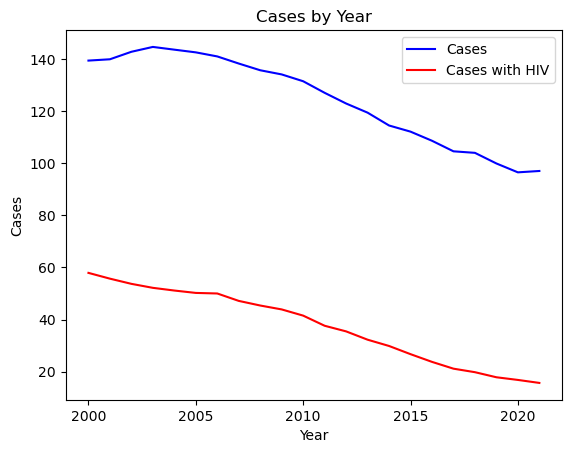

In [14]:
#Plot Cases per Capita by year with and without HI
cases, = plt.plot(by_year_df['Year'], by_year_df["Cases per Cap.(All)"], color="blue", label="Cases" )
hiv, = plt.plot(by_year_df['Year'], by_year_df['Cases -HIV & TB per Cap.'], color="red", label="Cases with HIV" )
plt.legend(handles=[cases, hiv], loc="best")
plt.title("Cases")
plt.xlabel("Year")
plt.ylabel("Cases per Capita")
plt.show()

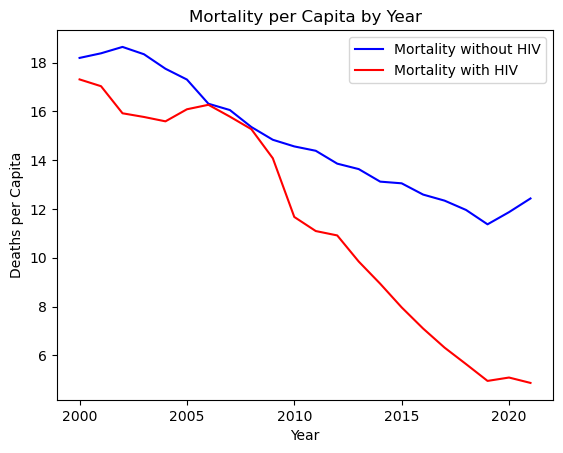

In [15]:
#Plot mortality by year with and without HIV
mortality, = plt.plot(by_year_df['Year'], by_year_df["Mortality - TB (exclude HIV)per Cap"], color="blue", label="Mortality without HIV" )
hiv_mortality, = plt.plot(by_year_df['Year'], by_year_df['Mortality - HIV & TB incident per Cap.'], color="red", label="Mortality with HIV" )
plt.legend(handles=[mortality, hiv_mortality], loc="best")
plt.title("Mortality")
plt.xlabel("Year")
plt.ylabel("Deaths per Capita")
plt.show()

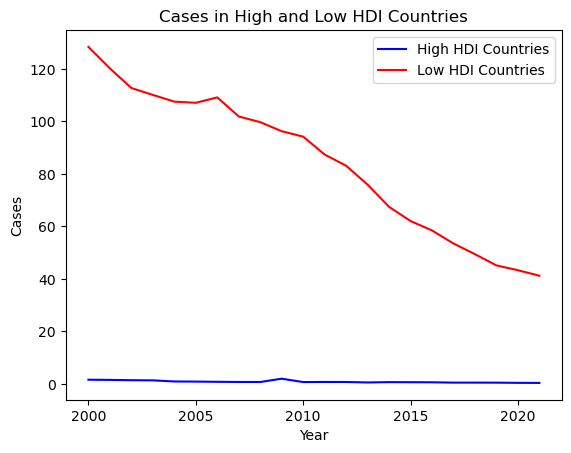

In [16]:
# Plot cases with HIV & TB by year for High and Low HDI countries
high, = plt.plot(high_by_year_df['Year'], high_by_year_df['Cases -HIV & TB per Cap.'], color="blue", label='High HDI Countries')
low, = plt.plot(low_by_year_df['Year'], low_by_year_df['Cases -HIV & TB per Cap.'], color="red", label='Low HDI Countries')
plt.legend(handles=[high, low], loc="best")
plt.title("Cases in High and Low HDI Countries")
plt.xlabel("Year")
plt.ylabel("Cases per Capita")
plt.show()

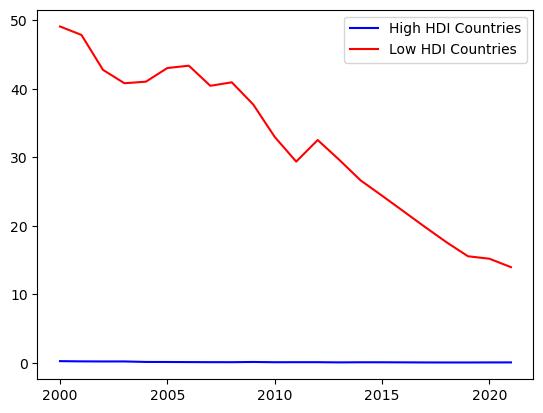

In [12]:
# Plot mortality with HIV & TB by year for High and Low HDI countries
high_cases, = plt.plot(high_by_year_df['Year'], high_by_year_df['Mortality - HIV & TB incident per Cap.'], color="blue", label='High HDI Countries')
low_cases, = plt.plot(low_by_year_df['Year'], low_by_year_df['Mortality - HIV & TB incident per Cap.'], color="red", label='Low HDI Countries')
plt.legend(handles=[high_cases, low_cases], loc="best")
plt.title("Mortality in High and Low HDI Countries")
plt.xlabel("Year")
plt.ylabel("Deaths per Capita")
plt.show()